# Dataset: *ebola-essien*

- df.to_csv(r'D:\論文\PHEME9\Data\CSV\ebola-essien-df.csv',index=False)
- src_tw_df.to_csv(r'D:\論文\PHEME9\Data\CSV\ebola-essien-src.csv',index=False)

In [1]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,ImageColorGenerator
import nltk
from nltk import FreqDist, word_tokenize

In [2]:
df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\ebola-essien-df.csv', encoding = 'utf-8', header = 0)
print(df.columns)
print(df.shape)
df.head(1)

Index(['src_tweet_id', 'src_user_id', 'src_tweet', 'src_date',
       'reply_tweet_id', 'reply_user_id', 'reply_tweet', 'reply_date', 'label',
       'cleaned_src_tw', 'cleaned_reply_tw', 'src_sentiment',
       'reply_sentiment', 'reply_emotion'],
      dtype='object')
(212, 14)


,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_src_tw,cleaned_reply_tw,src_sentiment,reply_sentiment,reply_emotion
0,521310417696858112,964926744,Breaking news: Ghana international and AC Mila...,Sun Oct 12 14:44:23 +0000 2014,521311862118711296,630241693,“@YuryAlkaev: Breaking news: Ghana internation...,Sun Oct 12 14:50:08 +0000 2014,1,break news ghana intern ac milan star michael ...,yuryalkaev break news ghana intern ac milan st...,Positive,Positive,Fear


In [3]:
src_tw_df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\ebola-essien-src.csv', encoding = 'utf-8', header =0)
print(src_tw_df.columns)
print(src_tw_df.shape)
src_tw_df.head(1)

Index(['src_tweet_id', 'src_user_id', 'src_tweet', 'src_date', 'label',
       'cleaned_src_tw', 'src_sentiment', 'src_emotion'],
      dtype='object')
(14, 8)


,src_tweet_id,src_user_id,src_tweet,src_date,label,cleaned_src_tw,src_sentiment,src_emotion
0,521310417696858112,964926744,Breaking news: Ghana international and AC Mila...,Sun Oct 12 14:44:23 +0000 2014,1,break news ghana intern ac milan star michael ...,Positive,Fear


In [4]:
df.isnull().sum()

src_tweet_id         0
src_user_id          0
src_tweet            0
src_date             0
reply_tweet_id       0
reply_user_id        0
reply_tweet          0
reply_date           0
label                0
cleaned_src_tw       0
cleaned_reply_tw    14
src_sentiment        0
reply_sentiment      0
reply_emotion        0
dtype: int64

In [5]:
df.loc[df.cleaned_reply_tw.isnull(),['reply_tweet','cleaned_reply_tw','reply_sentiment']]

,reply_tweet,cleaned_reply_tw,reply_sentiment
56,@TheBenchWarming @tp_ricky @JayNanners13,NaN,Neutral
59,@Sloddeuh @TheBenchWarming @TheMutherfxcker 😂😂😂😂😂,NaN,Neutral
78,@TransferRelated @FUTCrespo_,NaN,Neutral
82,@TransferRelated @PaOCallaghan,NaN,Neutral
89,@grindingAlbo @TransferRelated it's not,NaN,Neutral
100,@FutbolSergi @Goaldobin,NaN,Neutral
113,@FutbolLife @blayrobert @Carlosisking7,NaN,Neutral
135,@JamesChelsea16 @MichaelEssien ;),NaN,Neutral
159,@Mourinholic 😕😕 http://t.co/sFoV1v8uDo,NaN,Neutral
164,@br_uk @S_isley,NaN,Neutral


- Delete those meaningless responses.

In [6]:
df.dropna(inplace = True)

In [7]:
src_tw_df.isnull().sum()

src_tweet_id      0
src_user_id       0
src_tweet         0
src_date          0
label             0
cleaned_src_tw    0
src_sentiment     0
src_emotion       0
dtype: int64

In [9]:
df1 = pd.merge(df, src_tw_df[['src_tweet_id','src_sentiment','src_emo_te']], on='src_tweet_id')
df1.head(1)

,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_src_tw,cleaned_reply_tw,src_sentiment,reply_sentiment,reply_emotion,src_emotion
0,521310417696858112,964926744,Breaking news: Ghana international and AC Mila...,Sun Oct 12 14:44:23 +0000 2014,521311862118711296,630241693,“@YuryAlkaev: Breaking news: Ghana internation...,Sun Oct 12 14:50:08 +0000 2014,1,break news ghana intern ac milan star michael ...,yuryalkaev break news ghana intern ac milan st...,Positive,Positive,Fear,Fear


In [11]:
print("df's shape: ",df.shape)
print("df1's shape: ",df1.shape)
print("src_tw_df's shapes: ", src_tw_df.shape)

df's shape:  (198, 14)
df1's shape:  (198, 15)
src_tw_df's shapes:  (14, 8)


## Sentiment Analysis

### Source tweet Analysis

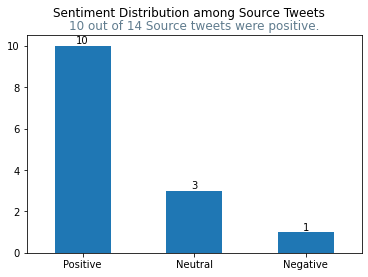

In [14]:
# Souce tweet sentiment analysis
ax = src_tw_df.src_sentiment.value_counts().plot.bar()

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
plt.title('10 out of 14 Source tweets were positive.',color='#607c8e')
plt.suptitle('Sentiment Distribution among Source Tweets')
plt.xticks(rotation=0)
plt.savefig('D:/論文/PHEME9/Code/graph/ebola-essien/src-sentiment.pdf',dpi=300)


  src_sentiment reply_sentiment  count
0      Negative        Negative      3
1      Negative         Neutral      1
2       Neutral        Negative     11
3       Neutral         Neutral     12
4       Neutral        Positive      2
5      Positive        Negative     41
6      Positive         Neutral     58
7      Positive        Positive     70


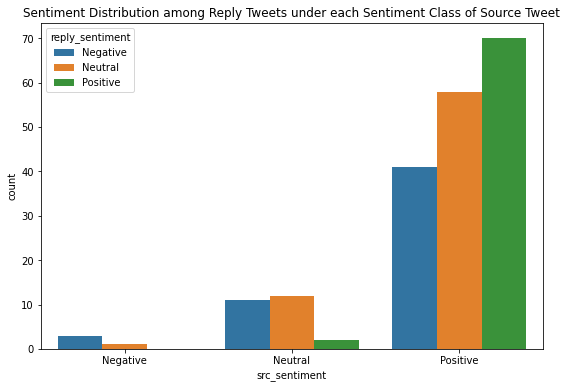

In [38]:
#which sentiment of original posts received most replys
a = pd.DataFrame(df.groupby(['src_sentiment','reply_sentiment']).size(),columns=['count']).reset_index()
print(a)
plt.figure(figsize=(9,6))
ax = sns.barplot(x = 'src_sentiment', y='count', data = a, hue = 'reply_sentiment')
title='Sentiment Distribution among Reply Tweets under each Sentiment Class of Source Tweet' 
ax.set_title(title, loc='center', wrap=True, y=1)

plt.savefig('D:/論文/PHEME9/Code/graph/ebola-essien/repnsrc-sentiment.pdf',dpi=300)
#positive source tweets tend to receive positive replys, vice versa.

In [40]:
# There was no non-rumour tweets to this event in the dataset.
src_tw_df.label.value_counts()

1    14
Name: label, dtype: int64

### Reply tweet Analysis

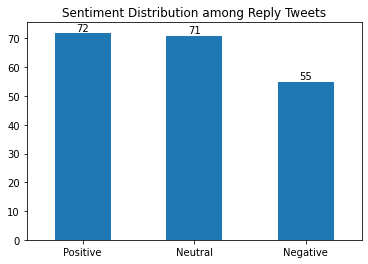

In [49]:
ax = df.reply_sentiment.value_counts().plot.bar()

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
plt.title('Sentiment Distribution among Reply Tweets')
plt.xticks(rotation=0)
plt.savefig('D:/論文/PHEME9/Code/graph/ebola-essien/rep-label-sentiment.pdf',dpi=300)


## Keywords Extraction

### Source Tweet Analysis

In [50]:
src_sen = src_tw_df.cleaned_src_tw.apply(word_tokenize)
src_tw_list = []
for sen in src_sen:
    for token in sen:
        src_tw_list.append(token)

src_tw_doc = " ".join(src_tw_list)

In [51]:
print ("There are {} words in all the source tweets.".format(len(src_tw_list)))

There are 162 words in all the source tweets.


In [63]:
def n_unique(list1):
    list_set = set(list1)
    unique_list = (list(list_set))
    n = len(unique_list)
    return (n,unique_list)
print ("There are {} unique words in all the source tweets."\
       .format(n_unique(src_tw_list)[0]))

There are 64 unique words in all the source tweets.


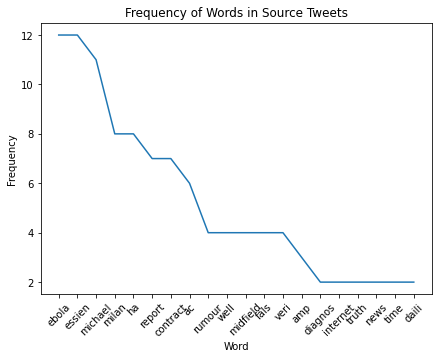

,Word,Frequency
0,ebola,12
1,essien,12
2,michael,11
3,milan,8
4,ha,8
5,report,7
6,contract,7
7,ac,6
8,rumour,4
9,well,4


In [72]:
freq = FreqDist(src_tw_list)
c = pd.DataFrame(freq.items(),columns = ['Word','Frequency'])\
    .sort_values('Frequency',ascending=False)
c.reset_index(inplace=True,drop=True)

fig = plt.figure(figsize = (7,5))
sns.lineplot(data=c.head(20),x='Word',y='Frequency')   
plt.xticks(rotation=45)
plt.title('Frequency of Words in Source Tweets')
plt.show()    
fig.savefig('D:/論文/PHEME9/Code/graph/ebola-essien/freqDist.pdf',dpi=300)
c.head(20)